In [9]:
import pandas as pd
import os 
from typing import List, Tuple, Union
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
from collections import Counter
from string import punctuation
import re

from wordcloud import WordCloud

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

from flair.models import TextClassifier
from flair.data import Sentence

from scipy import stats 
from sentence_transformers import SentenceTransformer, util

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
df = pd.read_csv("C:\\xampp\\htdocs\\php_scraper\\comments.csv")
df.head()


,Author,Comment
0,@dawn220,Question: Why do you want to be president agai...
1,@user-nj2mf2vp9w,I can not listen anymore
2,@almaequihua7483,This bitvh needs to get fired
3,@user-nj2mf2vp9w,i can not agree with anything President Trump ...
4,@PrincessAdim,FAKEST NEWS &amp; the Most dishonest PEOPLE in...


In [11]:
sid = SentimentIntensityAnalyzer()


In [12]:
df['Sentiment'] = df['Comment'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [13]:
scores = df['Sentiment']

In [14]:
print(df[['Author', 'Comment', 'Sentiment']])


                                Author  \
0                             @dawn220   
1                     @user-nj2mf2vp9w   
2                     @almaequihua7483   
3                     @user-nj2mf2vp9w   
4                        @PrincessAdim   
...                                ...   
70663                      @checho1986   
70664                    @glanerao1356   
70665                       @Angie2343   
70666                       @wavymcfly   
70667  @justkoolinwthekrewzoomsfor3235   

                                                 Comment  Sentiment  
0      Question: Why do you want to be president agai...     0.1531  
1                               I can not listen anymore     0.0000  
2                          This bitvh needs to get fired    -0.5574  
3      i can not agree with anything President Trump ...     0.0490  
4      FAKEST NEWS &amp; the Most dishonest PEOPLE in...    -0.8221  
...                                                  ...        ...  
70663

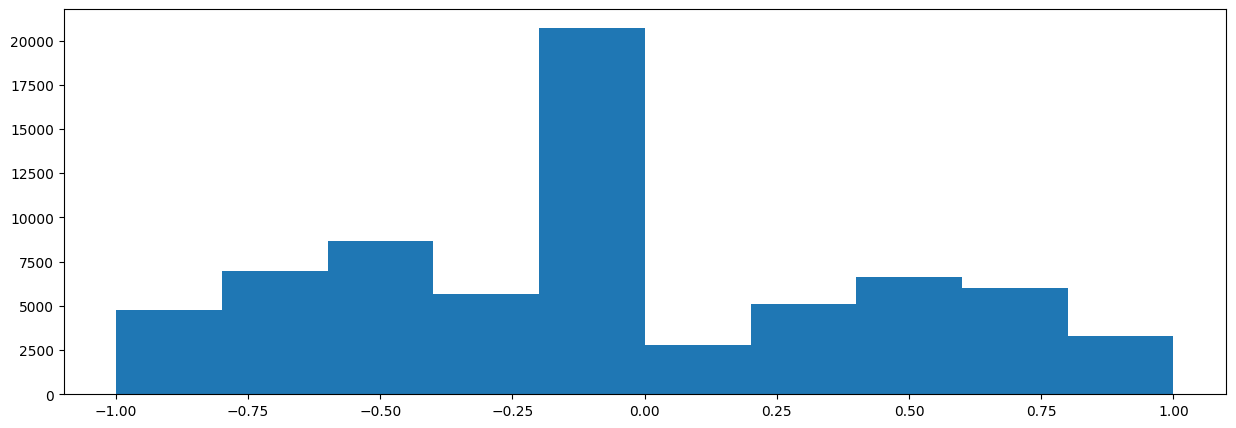

In [15]:
plt.figure(figsize=(15, 5))
plt.hist(scores)
plt.show()

In [16]:
np.mean(scores), np.std(scores)

(-0.045586314880851304, 0.49588255057889435)